In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\JAIMIN\Data Science\Machine Learning\heart+failure+clinical+records\heart_failure_clinical_records_dataset.csv")

In [3]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [8]:
df.DEATH_EVENT.unique()

array([1, 0], dtype=int64)

In [9]:
y = df[['age']]
y.head()

,age
0,75.0
1,55.0
2,65.0
3,50.0
4,65.0


In [10]:
x =df.drop(columns =["age"])
x

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [11]:
scaler = StandardScaler()

In [12]:
arr=scaler.fit_transform(x)

In [13]:
arr

array([[-8.71104775e-01,  1.65728387e-04, -8.47579380e-01, ...,
        -6.87681906e-01, -1.62950241e+00,  1.45416070e+00],
       [-8.71104775e-01,  7.51463953e+00, -8.47579380e-01, ...,
        -6.87681906e-01, -1.60369074e+00,  1.45416070e+00],
       [-8.71104775e-01, -4.49938761e-01, -8.47579380e-01, ...,
         1.45416070e+00, -1.59078490e+00,  1.45416070e+00],
       ...,
       [-8.71104775e-01,  1.52597865e+00,  1.17983050e+00, ...,
        -6.87681906e-01,  1.90669738e+00, -6.87681906e-01],
       [-8.71104775e-01,  1.89039811e+00, -8.47579380e-01, ...,
         1.45416070e+00,  1.93250906e+00, -6.87681906e-01],
       [-8.71104775e-01, -3.98321274e-01, -8.47579380e-01, ...,
         1.45416070e+00,  1.99703825e+00, -6.87681906e-01]])

In [14]:
df1=pd.DataFrame(arr)

In [15]:
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502,1.454161
1,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691,1.454161
2,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785,1.454161
3,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785,1.454161
4,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879,1.454161
5,1.147968,-0.552141,-0.847579,0.162199,1.359272,-6.079240e-01,0.683709,-1.050016,0.735688,1.454161,-1.577879,1.454161
6,1.147968,-0.346704,-0.847579,-1.953749,-0.735688,-1.396531e+00,-0.187726,0.085034,0.735688,-0.687682,-1.552067,1.454161
7,1.147968,-0.275472,1.179830,1.854958,-0.735688,1.952488e+00,-0.284552,-1.277026,0.735688,1.454161,-1.552067,1.454161
8,-0.871105,-0.438583,-0.847579,2.278147,-0.735688,7.535660e-09,0.102752,0.312044,-1.359272,-0.687682,-1.552067,1.454161
9,1.147968,-0.473683,-0.847579,-0.260991,1.359272,1.276539e+00,7.752020,-0.823006,0.735688,1.454161,-1.552067,1.454161


In [16]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,1.009969e-16,0.000000,9.060014e-17,-3.267546e-17,0.000000,7.723291e-17,1.425838e-16,-8.673849e-16,-8.911489e-18,-1.188199e-17,-1.901118e-16,2.376397e-17
std,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-8.711048e-01,-0.576918,-8.475794e-01,-2.038387e+00,-0.735688,-2.440155e+00,-8.655094e-01,-5.363206e+00,-1.359272e+00,-6.876819e-01,-1.629502e+00,-6.876819e-01
25%,-8.711048e-01,-0.480393,-8.475794e-01,-6.841802e-01,-0.735688,-5.208700e-01,-4.782047e-01,-5.959961e-01,-1.359272e+00,-6.876819e-01,-7.389995e-01,-6.876819e-01
50%,-8.711048e-01,-0.342574,-8.475794e-01,-7.076750e-03,-0.735688,-1.390846e-02,-2.845524e-01,8.503384e-02,7.356882e-01,-6.876819e-01,-1.969543e-01,-6.876819e-01
75%,1.147968e+00,0.000166,1.179830e+00,5.853888e-01,1.359272,4.111199e-01,5.926150e-03,7.660638e-01,7.356882e-01,1.454161e+00,9.387595e-01,1.454161e+00
max,1.147968e+00,7.514640,1.179830e+00,3.547716e+00,1.359272,6.008180e+00,7.752020e+00,2.582144e+00,7.356882e-01,1.454161e+00,1.997038e+00,1.454161e+00


In [17]:
df.shape

(299, 13)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(
    arr, y, test_size=0.30, random_state=42)

In [20]:
x_train

array([[-8.71104775e-01,  1.65728387e-04,  1.17983050e+00, ...,
        -6.87681906e-01,  9.64571161e-01, -6.87681906e-01],
       [-8.71104775e-01, -4.34453515e-01, -8.47579380e-01, ...,
        -6.87681906e-01, -8.29340416e-01,  1.45416070e+00],
       [ 1.14796753e+00, -5.11879746e-01, -8.47579380e-01, ...,
         1.45416070e+00,  9.12947806e-01, -6.87681906e-01],
       ...,
       [-8.71104775e-01,  1.71535786e-01, -8.47579380e-01, ...,
        -6.87681906e-01, -5.45411965e-01, -6.87681906e-01],
       [-8.71104775e-01,  1.65728387e-04,  1.17983050e+00, ...,
         1.45416070e+00,  1.46789887e+00, -6.87681906e-01],
       [-8.71104775e-01,  3.26388248e-01, -8.47579380e-01, ...,
         1.45416070e+00, -5.58317804e-01, -6.87681906e-01]])

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [22]:
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [24]:
lr.predict([[0,582,0,20,1,265000.00,1.9,130,1,0,4,1]])

array([[224678.08340313]])

In [25]:
import pickle
pickle.dump(lr,open('heart_failure_model.pickle', 'wb'))

In [26]:
%ls

 Volume in drive C is OS
 Volume Serial Number is E077-265C

 Directory of C:\Users\Jaimin Shah\Data Science

30-07-2024  09:38    <DIR>          .
25-07-2024  10:16    <DIR>          ..
29-07-2024  11:08    <DIR>          .ipynb_checkpoints
29-07-2024  09:24               689 admission_datalr_model
29-07-2024  09:31               525 admission_datalr_model.pickle
30-07-2024  09:38           101,511 Heart Failure Clinical Records.ipynb
30-07-2024  09:40               605 heart_failure_model.pickle
29-07-2024  10:00            63,123 Linear Regression Admission Data.ipynb
               5 File(s)        166,453 bytes
               3 Dir(s)  161,949,339,648 bytes free


In [27]:
model=pickle.load((open('heart_failure_model.pickle','rb')))

In [28]:
model

LinearRegression()

In [29]:
test1=scaler.transform([[0,582,0,20,1,265000.00,1.9,130,1,0,4,1]])

D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
model.predict(test1)

array([[67.79797966]])

In [31]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [32]:
lr.score(x_test,y_test)

0.04713584969289186

In [33]:
base_preds=lr.predict(x_test)
base_preds

array([[55.34588657],
       [59.22071814],
       [62.678615  ],
       [70.21306434],
       [58.93757339],
       [55.08615612],
       [67.81480478],
       [61.85338024],
       [68.88789083],
       [59.48023145],
       [62.08165638],
       [67.65775514],
       [65.30960818],
       [60.12274512],
       [59.85198643],
       [57.65694271],
       [60.0514601 ],
       [58.65710392],
       [68.05481937],
       [66.86431388],
       [58.16995013],
       [60.81952124],
       [58.53928909],
       [66.84013113],
       [64.79566103],
       [59.09088275],
       [54.12226374],
       [60.9426788 ],
       [64.82956442],
       [60.56046148],
       [65.80435455],
       [59.62725106],
       [58.92249872],
       [64.72899858],
       [64.84239862],
       [69.63155178],
       [69.75806553],
       [64.62371142],
       [58.77900968],
       [60.227069  ],
       [65.83059095],
       [64.55903575],
       [60.18568996],
       [60.32316363],
       [59.13176553],
       [57

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
mean_absolute_error(y_test,base_preds)

10.35192230194041

In [36]:
np.sqrt(mean_squared_error(y_test,base_preds))

12.074327143828635

In [37]:
y_test.mean()

age    60.9963
dtype: float64

In [38]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
vif_df =pd.DataFrame()

In [41]:
arr.shape[1]

12

In [42]:
vif_df['vif']= [variance_inflation_factor(arr,i) for i in range(arr.shape[1])]

In [43]:
vif_df

,vif
0,1.085262
1,1.066609
2,1.057896
3,1.153919
4,1.064787
5,1.045510
6,1.136088
7,1.110686
8,1.335580
9,1.284915


In [44]:
vif_df['feature']=x.columns

In [45]:
vif_df

,vif,feature
0,1.085262,anaemia
1,1.066609,creatinine_phosphokinase
2,1.057896,diabetes
3,1.153919,ejection_fraction
4,1.064787,high_blood_pressure
5,1.045510,platelets
6,1.136088,serum_creatinine
7,1.110686,serum_sodium
8,1.335580,sex
9,1.284915,smoking


<Axes: >

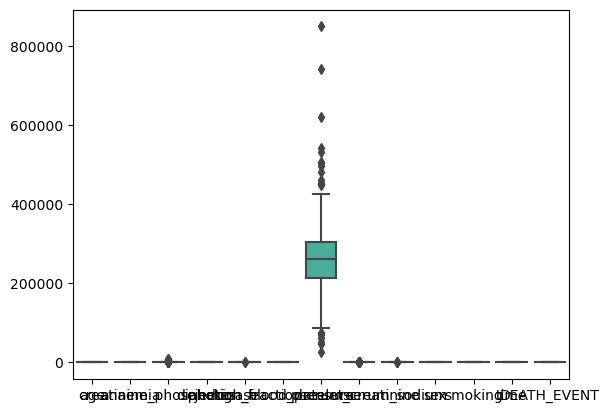

In [46]:
sns.boxplot(data=df)

In [47]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [48]:
df.drop(columns=['platelets'], inplace=True)

In [49]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,1.4,140,1,1,280,0


In [50]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,2.7,116,0,0,8,1


In [52]:
lr.predict([[75,0,582,0,20,1,1.9,130,1,0,4,1]])

array([[-425.7287071]])

In [53]:
import pickle
pickle.dump(lr,open('heart_failure_clinical_model.pickle', 'wb'))

In [54]:
%ls

 Volume in drive C is OS
 Volume Serial Number is E077-265C

 Directory of C:\Users\Jaimin Shah\Data Science

30-07-2024  09:47    <DIR>          .
25-07-2024  10:16    <DIR>          ..
29-07-2024  11:08    <DIR>          .ipynb_checkpoints
29-07-2024  09:24               689 admission_datalr_model
29-07-2024  09:31               525 admission_datalr_model.pickle
30-07-2024  09:46           154,449 Heart Failure Clinical Records.ipynb
30-07-2024  09:47               605 heart_failure_clinical_model.pickle
30-07-2024  09:40               605 heart_failure_model.pickle
29-07-2024  10:00            63,123 Linear Regression Admission Data.ipynb
               6 File(s)        219,996 bytes
               3 Dir(s)  161,948,622,848 bytes free


In [55]:
model=pickle.load((open('heart_failure_model.pickle','rb')))

In [56]:
model

LinearRegression()

In [57]:
test1=scaler.transform([[75,0,582,0,20,1,1.9,130,1,0,4,1]])

D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [58]:
model.predict(test1)

array([[-882.89128626]])

In [59]:
lr.score(x_test,y_test)

0.04713584969289186

In [60]:
base_preds=lr.predict(x_test)
base_preds

array([[55.34588657],
       [59.22071814],
       [62.678615  ],
       [70.21306434],
       [58.93757339],
       [55.08615612],
       [67.81480478],
       [61.85338024],
       [68.88789083],
       [59.48023145],
       [62.08165638],
       [67.65775514],
       [65.30960818],
       [60.12274512],
       [59.85198643],
       [57.65694271],
       [60.0514601 ],
       [58.65710392],
       [68.05481937],
       [66.86431388],
       [58.16995013],
       [60.81952124],
       [58.53928909],
       [66.84013113],
       [64.79566103],
       [59.09088275],
       [54.12226374],
       [60.9426788 ],
       [64.82956442],
       [60.56046148],
       [65.80435455],
       [59.62725106],
       [58.92249872],
       [64.72899858],
       [64.84239862],
       [69.63155178],
       [69.75806553],
       [64.62371142],
       [58.77900968],
       [60.227069  ],
       [65.83059095],
       [64.55903575],
       [60.18568996],
       [60.32316363],
       [59.13176553],
       [57

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [62]:
mean_absolute_error(y_test,base_preds)

10.35192230194041

In [63]:
np.sqrt(mean_squared_error(y_test,base_preds))

12.074327143828635

In [64]:
y_test.mean()

age    60.9963
dtype: float64